### Домашняя работа

**4.1 Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [32]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:
model_ridge = Ridge(alpha=8).fit(X_train, y_train)
y_pred1 = model_ridge.predict(X_valid)
y_pred_train1 = model_ridge.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred1))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train1))


Качество на валидации: 0.085
Качество на обучении: 0.087


In [51]:
model_lasso = Lasso(alpha=8).fit(X_train, y_train)
y_pred2 = model_lasso.predict(X_valid)
y_pred_train2 = model_lasso.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred2))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train2))

Качество на валидации: 0.157
Качество на обучении: 0.216


C:\Users\twoespressos\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.272473996330471, tolerance: 0.0024481555784964045
  positive)


In [54]:
x_coef_ridge = model_ridge.coef_
x_coef_lasso = model_lasso.coef_
print(x_coef_ridge)
print(x_coef_lasso)

[ 0.14312846  0.15321203  0.09318525 -0.02468608 -0.09129061  0.04568731
 -0.00776645  0.00045106]
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.09811184e-03  1.49133298e-04  3.75768286e-05 -7.57096634e-07]


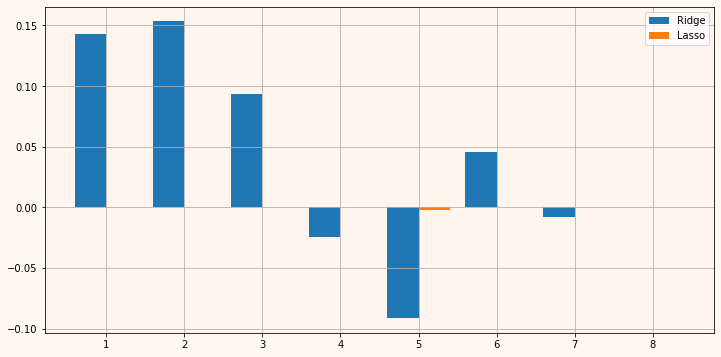

In [55]:
from matplotlib import pyplot as plt
#  Задаем смещение равное половине ширины прямоугольника:
x1 = np.arange(1, 9) - 0.2
x2 = np.arange(1, 9) + 0.2
y1 = x_coef_ridge
y2 = x_coef_lasso
fig, ax = plt.subplots()
ax.bar(x1, y1, width = 0.4)
ax.bar(x2, y2, width = 0.4)
plt.legend(['Ridge','Lasso'])
ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')
#plt.xticks(np.arange(0,16),desktop.page, rotation=90)
plt.grid(True)
plt.show()

**4.2 Задание среднего уровня** Мы использовали реализацию Ridge регрессии из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [2]:
import numpy as np
from numpy.linalg import inv 

In [5]:
data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [6]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [60]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
alpha = 0.5
E = np.eye(N=8)


In [61]:
model = inv(X_train.T.dot(X_train)+alpha*E).dot(X_train.T).dot(y_train)
model

array([ 1.55930040e+00,  4.65465582e-01, -1.61285287e-01, -3.79626454e-01,
        1.94099126e-01, -3.40617231e-02,  2.19222832e-03, -1.90340211e-05])

In [ ]:
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

In [57]:
from sklearn.linear_model import LinearRegression
shit = LinearRegression().fit(X_train, y_train)
type(shit)
z = shit.intercept_
a = shit.coef_

In [58]:
a

array([ 2.28667880e+01, -4.88349711e+01,  4.96569353e+01, -2.73660383e+01,
        8.59043439e+00, -1.53599788e+00,  1.45687209e-01, -5.68878551e-03])